# Python Interactive Maps with Folium

# Notes

* folium is similar to ipyleaflet but different in some functionaly and syntax
* for install instructions go to python.org, python package index, search for folium

# Data Files

* indiana_outline_map.geojson
* sales_region1.geojson
* sales_region2.geojson
* sales_region3.geojson
* geojson_indianacounties.geojson
* indiana_population_by_county.csv
* flags_of_africa.png (from Wikipedia)

# Documentation

In [2]:
from IPython.display import IFrame
documentation = IFrame(src='https://python-visualization.github.io/folium/', width=1000, height=500)
display(documentation)

In [3]:

%pip install folium
%pip install geocoder
%pip install geopy
%pip install vega_datasets


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Imports

In [4]:
import folium # pip install folium
from folium import plugins
import ipywidgets
import geocoder # pip install geocoder
import geopy # pip install geopy
import numpy as np
import pandas as pd
from vega_datasets import data as vds # pip install vega_datasets

# Basic Maps

In [5]:
#folium.Map?

In [6]:
folium.Map()

In [7]:
map1 = folium.Map(location=[39.4699, -0.3763],
                 zoom_start=15,
                 width=500,
                 height=300,
                 control_scale=True)
map1

In [8]:
# another way to change map size

from branca.element import Figure

fig = Figure(width=500, height=300)
fig.add_child(map1)
fig

# Save Map

In [9]:
map1.save('map1.html')

# Map Types

In [10]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import folium

# widget
select_widget = widgets.Select(
    options=['Open Street Map', 'Terrain', 'Toner', 'Watercolor', 'Positron', 'Dark Matter'],
    value='Open Street Map',
    description='Map Type:',
    disabled=False
)

# función
def select(map_type):
    clear_output(wait=True)  # limpia la salida previa
    display(select_widget)   # vuelve a mostrar el widget
    if map_type == 'Open Street Map':
        m = folium.Map(location=[40.416719, -3.684016], zoom_start=12, height=500)
    elif map_type == 'Terrain':
        m = folium.Map(location=[40.416719, -3.684016], tiles='Stamen Terrain', zoom_start=12, height=400)
    elif map_type == 'Toner':
        m = folium.Map(location=[40.416719, -3.684016], tiles='Stamen Toner', zoom_start=12, height=400)
    elif map_type == 'Watercolor':
        m = folium.Map(location=[40.416719, -3.684016], tiles='Stamen Watercolor', zoom_start=12, height=400)
    elif map_type == 'Positron':
        m = folium.Map(location=[40.416719, -3.684016], tiles='CartoDB Positron', zoom_start=12, height=400)
    elif map_type == 'Dark Matter':
        m = folium.Map(location=[40.416719, -3.684016], tiles='CartoDB Dark_Matter', zoom_start=12, height=400)
    display(m)

# interacción
widgets.interact(select, map_type=select_widget);


interactive(children=(Select(description='Map Type:', options=('Open Street Map', 'Terrain', 'Toner', 'Waterco…

In [11]:
# show map types using layer control
# Layers: https://deparkes.co.uk/2016/06/10/folium-map-tiles/

# map
map_layer_control = folium.Map(location=[40.416719, -3.684016], zoom_start=12)

# add tiles to map
folium.raster_layers.TileLayer('Open Street Map', attr="some reference").add_to(map_layer_control)
folium.raster_layers.TileLayer('Stamen Terrain', attr="some reference").add_to(map_layer_control)
folium.raster_layers.TileLayer('Stamen Toner', attr="some reference").add_to(map_layer_control)
folium.raster_layers.TileLayer('Stamen Watercolor', attr="some reference").add_to(map_layer_control)
folium.raster_layers.TileLayer('CartoDB Positron', attr="some reference").add_to(map_layer_control)
folium.raster_layers.TileLayer('CartoDB Dark_Matter', attr="some reference").add_to(map_layer_control)

# add layer control to show different maps
folium.LayerControl().add_to(map_layer_control)

# display map
map_layer_control

In [12]:
map_with_mini = folium.Map(location=[40.416719, -3.684016], zoom_start=7)

minimap = plugins.MiniMap(toggle_display = True)

map_with_mini.add_child(minimap)

plugins.Fullscreen(position = 'topright').add_to(map_with_mini)

map_with_mini

# Markers

In [13]:
#folium.Marker?

In [14]:
# airports dataframe using vega_datasets
airports = vds.airports()
airports = airports[:25]
airports.head()

iata                  name              city state country   latitude  \
0  00M               Thigpen       Bay Springs    MS     USA  31.953765   
1  00R  Livingston Municipal        Livingston    TX     USA  30.685861   
2  00V           Meadow Lake  Colorado Springs    CO     USA  38.945749   
3  01G          Perry-Warsaw             Perry    NY     USA  42.741347   
4  01J      Hilliard Airpark          Hilliard    FL     USA  30.688012   

    longitude  
0  -89.234505  
1  -95.017928  
2 -104.569893  
3  -78.052081  
4  -81.905944

In [15]:
# multiple markers using dataframe
# there is an example below using apply function instead of loop

# create map
map_airports = folium.Map(location=[38, -98], zoom_start=4)

# plot airport locations
for (index, row) in airports.iterrows():
    folium.Marker(location = [row.loc['latitude'], row.loc['longitude']],
                 popup = row.loc['name'] + ' ' + row['city'],
                 tooltip = 'click').add_to(map_airports)

    
# display map    
map_airports

In [16]:
# markers with apply function

# map
map_airports2 = folium.Map(location=[38, -98], zoom_start=4)

# plot airport locations using apply
airports.apply(lambda row: folium.Marker(location = [row['latitude'], row['longitude']]).add_to(map_airports2), axis=1)

# display map
map_airports2                                                

In [17]:
# multiple markers using dictionary

markers_dict = {'Los Angeles': [34.041008, -118.246653], 
                'Las Vegas': [36.169726, -115.143996], 
                'Denver': [39.739448, -104.992450], 
                'Chicago': [41.878765, -87.643267], 
                'Manhattan': [40.782949, -73.969559]}

# create map
map_cities = folium.Map(location=[41, -99], zoom_start=4)

# plot locations
for i in markers_dict.items():
    folium.Marker(location=i[1], popup=i[0]).add_to(map_cities)
    print(i)

# display map    
map_cities

('Los Angeles', [34.041008, -118.246653])
('Las Vegas', [36.169726, -115.143996])
('Denver', [39.739448, -104.99245])
('Chicago', [41.878765, -87.643267])
('Manhattan', [40.782949, -73.969559])


# Custom Markers

In [18]:
#folium.Icon?

In [19]:
# map
map_cm_fa = folium.Map(location=[38, -98], zoom_start=4)

'''
Iconos 'fa'
Iconos 'glyphicon'
'''
# add custom marker to map
folium.Marker(location=[38, -98], 
              popup='popup', 
              icon=folium.Icon(color='green', icon='bolt', prefix='fa')).add_to(map_cm_fa)

# display map
map_cm_fa

In [20]:
# search for 'glyphicon bootstrap' icons to see examples

# map
map_cm_glyphicon = folium.Map(location=[38, -98], zoom_start=4)

# add custom marker to map
folium.Marker(location=[38, -98], 
              popup='popup', 
              icon=folium.Icon(icon='glyphicon-plane', prefix='glyphicon')).add_to(map_cm_glyphicon)

# display map
map_cm_glyphicon

In [21]:
# multiple custom markers

# dataframe with custom marker names
cm_df = pd.DataFrame({'city': ['Los Angeles', 'Las Vegas', 'Denver', 'Chicago', 'Manhattan'],
                      'latitude': [34.041008, 36.169726, 39.739448, 41.878765, 40.782949],
                      'longitude': [-118.246653, -115.143996, -104.992450, -87.643267, -73.969559],
                      'icon': ['bicycle', 'car', 'bus', 'truck', 'motorcycle']})
cm_df

city   latitude   longitude        icon
0  Los Angeles  34.041008 -118.246653     bicycle
1    Las Vegas  36.169726 -115.143996         car
2       Denver  39.739448 -104.992450         bus
3      Chicago  41.878765  -87.643267       truck
4    Manhattan  40.782949  -73.969559  motorcycle

In [22]:
# map
map_cm_multiple = folium.Map(location=[38, -98], zoom_start=4)

# add markers to map
# for loop with itertuples (experiment that appears to work well)
# can also use iterrows or dataframe apply

for i in cm_df.itertuples():
    folium.Marker(location=[i.latitude, i.longitude], 
                  popup=i.city,
                  icon=folium.Icon(icon=i.icon, prefix='fa')).add_to(map_cm_multiple)

# display map    
map_cm_multiple

In [23]:
# enumerate markers

# data
cm_enum_df = pd.DataFrame({'city': ['Los Angeles', 'Las Vegas', 'Denver', 'Chicago', 'Manhattan'],
                           'latitude': [34.041008, 36.169726, 39.739448, 41.878765, 40.782949],
                           'longitude': [-118.246653, -115.143996, -104.992450, -87.643267, -73.969559],
                           'icon_num': [1, 2, 3, 4, 5]})

# map
map_enum_icons = folium.Map([38, -98], zoom_start=4)

# icons using plugins.BeautifyIcon
for i in cm_enum_df.itertuples():
    folium.Marker(location=[i.latitude, i.longitude],
                  popup=i.city,
                  icon=plugins.BeautifyIcon(number=i.icon_num,
                                            border_color='blue',
                                            border_width=1,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(map_enum_icons)

# display map    
map_enum_icons

# Circle Markers

In [24]:
# map
map_circle = folium.Map(location=[38, -98], zoom_start=4)

# radius of the circle in meters
folium.Circle(radius = 100000, location = [38, -98], color = 'green').add_to(map_circle)

# circle of a fixed size with radius specified in pixels
folium.CircleMarker(location=[39, -105], radius = 25, color = 'blue', fill_color = 'yellow').add_to(map_circle)

# display map
map_circle

# Plot Route

In [25]:
# route

# map
map_plot_route = folium.Map(location=[38, -98], zoom_start=4)

# route_locs = ['Los Angeles', 'Las Vegas', 'Denver', 'Chicago', 'Manhattan']
# can use list of lists or list of tuples
route_lats_longs = [[34.041008,-118.246653],
                    [36.169726,-115.143996], 
                    [39.739448,-104.992450], 
                    [41.878765,-87.643267], 
                    [40.782949,-73.969559]]

# add route to map
folium.PolyLine(route_lats_longs).add_to(map_plot_route)

# display map
map_plot_route

In [26]:
# ant path route
# uses import - from folium import plugins

# map
map_ant_route = folium.Map(location=[38, -98], zoom_start=4)

# add ant path route to map
plugins.AntPath(route_lats_longs).add_to(map_ant_route)

# display map
map_ant_route

# Overlay GeoJSON Layers

In [27]:
# use a link or file
# use geojson.io to create custom geojson files
# can also use folium Draw control to create geojson files (example below)
# convert shapefiles to geojson using QGIS

# map
map_geojson = folium.Map(location=[39.77, -86.15], zoom_start=7)

# add geojson file to map
folium.GeoJson('indiana_outline_map.geojson', name='geojson indiana').add_to(map_geojson)

# add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_geojson)

# display map
map_geojson

# Subgroups with GeoJSON

In [28]:
# map
map_with_subgroups = folium.Map(location=[39.77, -86.15], zoom_start=7)

# all subgroups
all_subgroups = folium.FeatureGroup(name='all sales regions')
map_with_subgroups.add_child(all_subgroups)

# subgroup 1
sales_region1 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 1')
map_with_subgroups.add_child(sales_region1)

# subgroup 2
sales_region2 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 2')
map_with_subgroups.add_child(sales_region2)

# subgroup 3
sales_region3 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 3')
map_with_subgroups.add_child(sales_region3)

# pull in geojson layers and add to map
folium.GeoJson('sales_region1.geojson').add_to(sales_region1)
folium.GeoJson('sales_region2.geojson').add_to(sales_region2)
folium.GeoJson('sales_region3.geojson').add_to(sales_region3)

# add layer control to map (allows layers to be turned on or off)
folium.LayerControl(collapsed=False).add_to(map_with_subgroups)

# display map
map_with_subgroups

# Choropleth Map

In [29]:
#folium.Choropleth?

In [30]:
import json

# load geo_json
# shapefiles can be converted to geojson with QGIS
with open('geojson_indiana_counties.geojson') as f:
    geo_json_counties = json.load(f)
    
for i in geo_json_counties['features']:
    i['id'] = i['properties']['NAME_L']

In [31]:
geo_json_counties['features'][0]

{'type': 'Feature',
 'properties': {'AREA': 835203110.44822,
  'PERIMETER': 116410.31836,
  'NAME_U': 'STEUBEN',
  'NAME_L': 'Steuben',
  'NCAPC': 76,
  'CNTY_FIPS': '151',
  'STFID': '18151',
  'POP2000': 33214,
  'WHITE': 32281,
  'BLACK': 123,
  'AMERI_ES': 109,
  'ASIAN': 133,
  'HAWN_PI': 6,
  'OTHER': 283,
  'MULT_RACE': 279,
  'HISPANIC': 683,
  'MALES': 16771,
  'FEMALES': 16443,
  'AGE_UNDER5': 2199,
  'AGE_5_17': 6322,
  'AGE_18_21': 2241,
  'AGE_22_29': 3307,
  'AGE_30_39': 4832,
  'AGE_40_49': 4966,
  'AGE_50_64': 5411,
  'AGE_65_UP': 3936,
  'MED_AGE': 35.5,
  'MED_AGE_M': 34.2,
  'MED_AGE_F': 36.9,
  'HOUSEHOLDS': 12738,
  'AVE_HH_SZ': 2.53,
  'HSEHLD_1_M': 1462,
  'HSEHLD_1_F': 1634,
  'MARHH_CHD': 3057,
  'MARHH_NO_C': 4208,
  'MHH_CHILD': 375,
  'FHH_CHILD': 715,
  'FAMILIES': 8911,
  'AVE_FAM_SZ': 3.0,
  'HSE_UNITS': 17337,
  'VACANT': 4599,
  'OWNER_OCC': 9951,
  'RENTER_OCC': 2787},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-84.84040837705693, 41.76

In [32]:
pop_df = pd.read_csv('indiana_population_by_county.csv')
pop_df[pop_df['County'] == 'Steuben']

County    State  Population
75  Steuben  Indiana       34586

In [33]:
# more examples for choropleth maps in the documentation

import json

# load geo_json
# shapefiles can be converted to geojson with QGIS
with open('geojson_indiana_counties.geojson') as f:
    geo_json_counties = json.load(f)
    
# add feature 'id' county name to geojson
# access features
for i in geo_json_counties['features']:
    i['id'] = i['properties']['NAME_L']
    
# load data associated with geo_json
pop_df = pd.read_csv('indiana_population_by_county.csv')

# map    
map_choropleth = folium.Map(location=[39.77, -86.15], zoom_start=7)

# choropleth
folium.Choropleth(
    geo_data=geo_json_counties,
    name='choropleth',
    data=pop_df,
    columns=['County', 'Population'],
    # see folium.Choropleth? for details on key_on
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Population',
    highlight=True
).add_to(map_choropleth)

# layer control to turn choropleth on or off
folium.LayerControl().add_to(map_choropleth)

# display map
map_choropleth

# Heat Map

In [34]:
# heat map over time

# data
# take note of data format needed for heat map with time (using plugins.HeatMapWithTime?)
heatmap_time_data = (np.random.random((100,20,2)) + np.array([[39, -98]])).tolist()

# dates
heatmap_time_dates = [d.strftime('%Y-%m-%d') for d in pd.date_range('20160101', periods=len(heatmap_time_data))]

# map
map_heatmap_time = folium.Map([39, -98], tiles='CartoDB Dark_Matter', zoom_start=6)

# heatmap plugin
heatmap_time_plugin = plugins.HeatMapWithTime(heatmap_time_data, index=heatmap_time_dates)

# add heatmap plugin to map
heatmap_time_plugin.add_to(map_heatmap_time)

# display map
map_heatmap_time

# Latitude and Longitude Tool

In [35]:
# map
map_lat_long = folium.Map(location=[38, -98], zoom_start=4)

# add latitude and longitude tool to map
map_lat_long.add_child(folium.LatLngPopup())

# display map
map_lat_long

# Measure Control

In [36]:
# map
map_measure = folium.Map([40, -100], zoom_start=4)

# measure control
measure_control = plugins.MeasureControl(position='topleft', 
                                         active_color='red', 
                                         completed_color='red', 
                                         primary_length_unit='miles')

# add measure control to map
map_measure.add_child(measure_control)

# display map
map_measure

In [37]:
#plugins.MeasureControl?

# Dual Map

In [38]:
# dual map
map_dual = plugins.DualMap(location=[40, -98], tiles=None, zoom_start=4)

# map tiles
folium.TileLayer('Stamen Terrain', attr = "attr").add_to(map_dual)
folium.TileLayer('CartoDB Positron', attr = "attr").add_to(map_dual)

# add layer control to maps
folium.LayerControl().add_to(map_dual)

# display map(s)
map_dual

# Draw

In [39]:
# map
map_draw = folium.Map(location=[40, -99], zoom_start=4)

# draw tools
# export=True exports the drawn shapes as a geojson file
draw = plugins.Draw(export=True)

# add draw tools to map
draw.add_to(map_draw)

# display map
map_draw

In [40]:
#plugins.Draw?

# Overlay Image


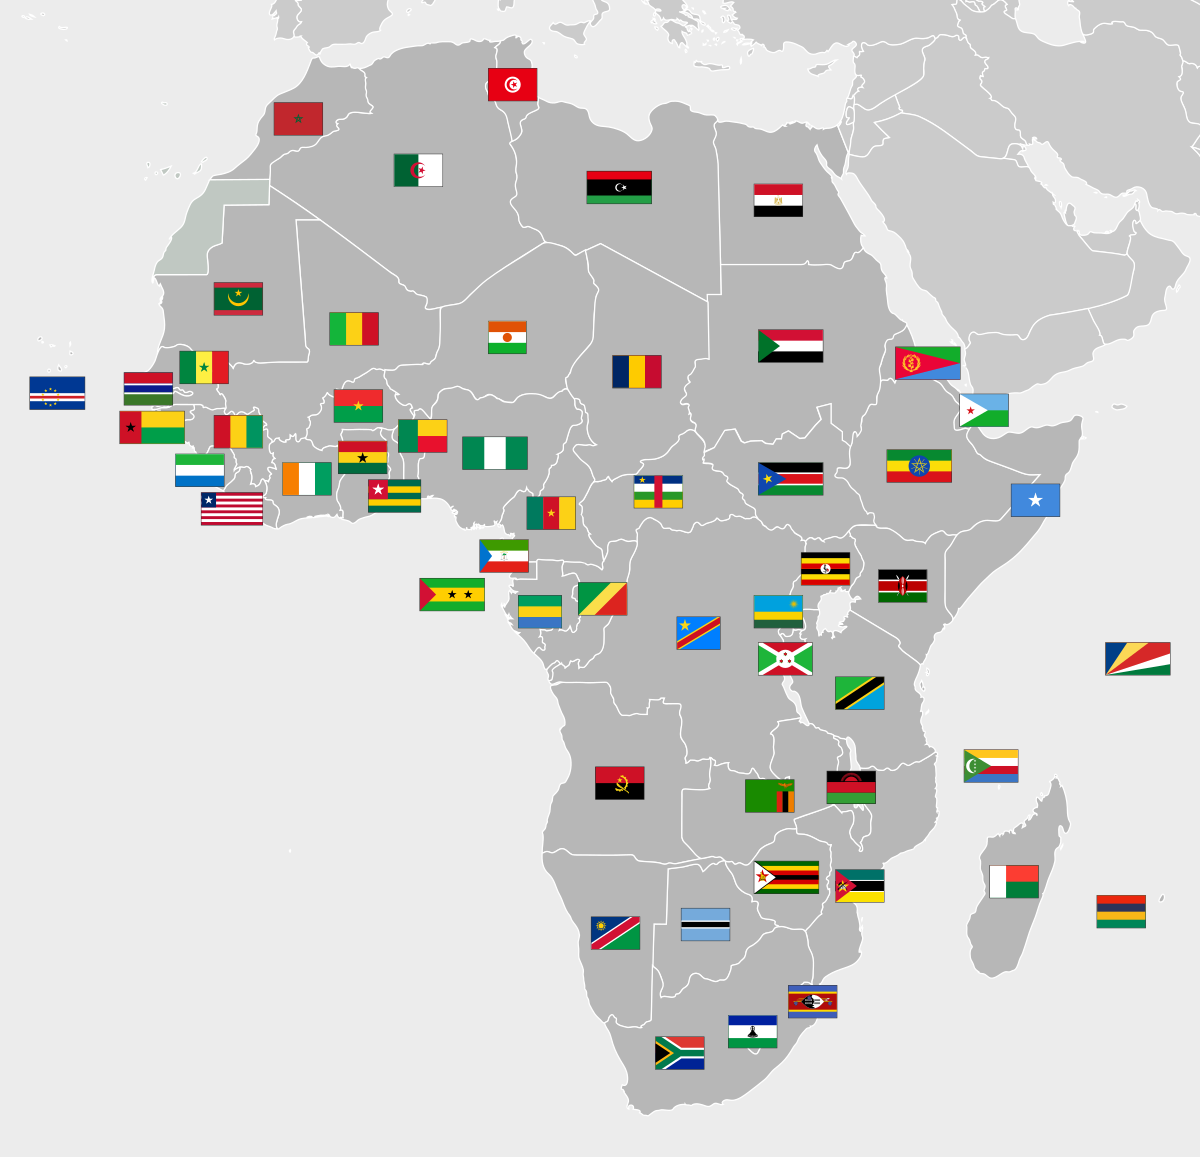

In [41]:
# map
# map of Africa flags from Wikipedia
map_img_overlay = folium.Map([2,22], zoom_start=3, tiles='CartoDB Positron')

# image to overlay on map
img_overlay = folium.raster_layers.ImageOverlay(name='flags of Africa', 
                                                image='flags_of_africa.png',
                                                # bounds - [[lat_min, lon_min], [lat_max, lon_max]]
                                                bounds=[[-38, -28], [40, 60]],
                                                opacity=0.5)
# add image to map
img_overlay.add_to(map_img_overlay)

# layer control to click layer on or off
folium.LayerControl().add_to(map_img_overlay)

# display map
map_img_overlay

# Charts in Popup

In [42]:
seattle_weather = vds.seattle_weather()
seattle_weather.head()

date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain

In [43]:
#%pip install altair
#%pip install vega

In [44]:
#!pip install altair
#!pip install vega

import altair
altair.renderers.enable('default')

sw_means = pd.DataFrame({'seattle_x': ['precipitation', 'temp_max', 'temp_min', 'wind'],
                         'seattle_y': [seattle_weather.precipitation.mean(),
                                       seattle_weather.temp_max.mean(),
                                       seattle_weather.temp_min.mean(),
                                       seattle_weather.wind.mean()]})

sw_bar = altair.Chart(sw_means, width=300).mark_bar().encode(
    x='seattle_x',
    y='seattle_y').properties(title='Seattle Weather Averages')

sw_bar

ModuleNotFoundError: No module named 'altair'

In [ ]:
# embed seattle weather data in marker corresponding to location

# folium.features.VegaLite creates a Vega-Lite chart element
vega = folium.features.VegaLite(sw_bar, width='100%', height='100%')

# create map
map_sw = folium.Map(location=[47.606322, -122.332575])

# create marker on the map, with optional popup text or Vincent visualization
sw_marker = folium.features.Marker([47.60, -122.33])

# create popup
sw_popup = folium.Popup()

# add chart to popup
vega.add_to(sw_popup)

# add popup to marker
sw_popup.add_to(sw_marker)

# add marker to map
sw_marker.add_to(map_sw)

map_sw

# Spain Choropleth

In [ ]:
# MAPA DE TOTAL DE DECESOS 
import pandas as pd
data_total_mean = pd.read_csv('decesos_espania.csv', sep=';')
 
# Initialize the map:
m = folium.Map(location=[42.1257, -8], zoom_start = 5)

# add tile layers to the map
# con esto posibilito que luego en el mapa pueda elegir el 'tipo de vista'
tiles = ['stamenwatercolor','cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile, attr = "attr").add_to(m)
    
 
# Add the color for the chloropleth:
folium.Choropleth(
 geo_data='provincias-espanolas 2.0.geojson',
 name='choropleth',
 data=data_total_mean,
 columns=['Comunidad Autónoma', 'Todas las causas'],
 key_on='feature.properties.ccaa',   # dentro del 'geojson', viendo su estructura de datos
 fill_color='BuPu',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Decesos por comunidad autonoma'
).add_to(m)

m
